In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
### Samples
input_samples = np.array([[0,0],[0,1],[1,0],[1,1]])
output_samples = np.array([[0],[1],[1],[0]])
print("input_samples",input_samples)
print("output_samples",output_samples)

input_samples [[0 0]
 [0 1]
 [1 0]
 [1 1]]
output_samples [[0]
 [1]
 [1]
 [0]]


In [0]:
### Create the model (Neural Network/Algorithm) (Tensorflow/Keras)
model = tf.keras.models.Sequential()

In [0]:
### Adding the layers(2 -> 1 input + 1 ouptut)
# don't know the dimension => use flatten
# know the dimension => use dense
model.add(tf.keras.layers.Dense(len(input_samples),input_dim=2,activation='relu'))  #input layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))  #output layer

In [0]:
### Configuring the model
# Adam optimiser is the most common, can use sdd
# Binary accuracy - accuracy increases at a step of 0.25
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])  

In [6]:
### Training the model
trained_model = model.fit(input_samples,output_samples,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2451 - binary_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2451 - binary_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2450 - binary_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2450 - binary_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2449 - binary_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2449 - binary_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2448 - binary_accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2448 - binary_accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2447 - binary_accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 1ms/step 

In [7]:
model.predict(input_samples)

array([[0.42264098],
       [0.42264098],
       [0.70047617],
       [0.42264098]], dtype=float32)

In [8]:
model.predict(input_samples).round()

array([[0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [9]:
loss,accu = model.evaluate(input_samples,output_samples)
print(loss,accu)

1/1 [==============================] - 0s 2ms/step - loss: 0.1951 - binary_accuracy: 0.7500
0.19507719576358795 0.75


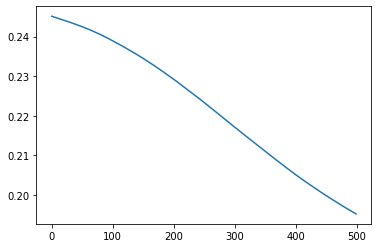

In [10]:
### Plot loss vs epoch Graph
loss_curve = trained_model.history['loss']
plt.plot(loss_curve)
plt.show()

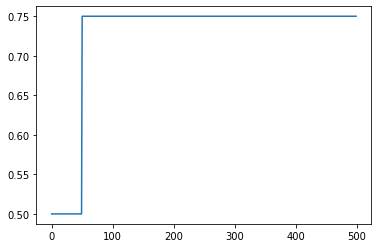

In [11]:
### Plot accuracy vs epoch Graph
accu_curve = trained_model.history['binary_accuracy']  
plt.plot(accu_curve)
plt.show()

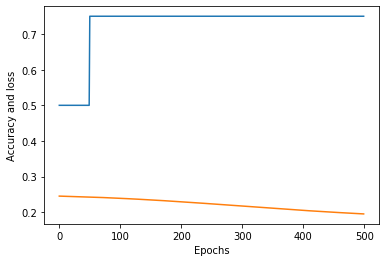

In [12]:
# Plotting bothe accuracy and loss together
plt.xlabel("Epochs")
plt.ylabel("Accuracy and loss")
plt.plot(accu_curve)
plt.plot(loss_curve)
plt.show()

In [13]:
model.save('myXORmodel.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: myXORmodel.model/assets


In [0]:
# Saving the Model in a file
my_model = tf.keras.models.load_model('myXORmodel.model')

In [15]:
# Using the saved model to predict again
my_model.predict(input_samples).round()

array([[0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [16]:
print(input_samples)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [17]:
new_input_samples = np.array([[1,1],[0,0],[0,1],[1,0]])
my_model.predict(new_input_samples).round()

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)